In [1]:
import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle

In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    return df1, lista, df2, df1_Final,df2_Final,listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1,lista, df2, df1_Final,df2_Final,listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-06-01 00:00:00,77.127,2020-06-01,2020,6,0,0,23
2020-06-01 01:00:00,32.415,2020-06-01,2020,6,0,1,23
2020-06-01 02:00:00,20.189,2020-06-01,2020,6,0,2,23
2020-06-01 03:00:00,46.381,2020-06-01,2020,6,0,3,23
2020-06-01 04:00:00,64.061,2020-06-01,2020,6,0,4,23


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data4.tail(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-06-30 19:00:00,627.217,2020-06-30,2020,6,1,19,27
2020-06-30 20:00:00,570.976,2020-06-30,2020,6,1,20,27
2020-06-30 21:00:00,364.474,2020-06-30,2020,6,1,21,27
2020-06-30 22:00:00,255.147,2020-06-30,2020,6,1,22,27
2020-06-30 23:00:00,151.052,2020-06-30,2020,6,1,23,27


In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_6382/1874347136.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_6382/1874347136.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

/tmp/ipykernel_6382/1874347136.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_6382/1874347136.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

# Periodo desescalada Lunes

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
desescalada = pd.concat([period1,period2])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08')
mask = (desescalada['Fecha'] >= start_date) & (desescalada['Fecha'] <= end_date)
desescalada = desescalada.loc[mask]
desescalada = desescalada.reset_index()
desescalada = desescalada.set_index(["ds"])
#desescalada.head(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


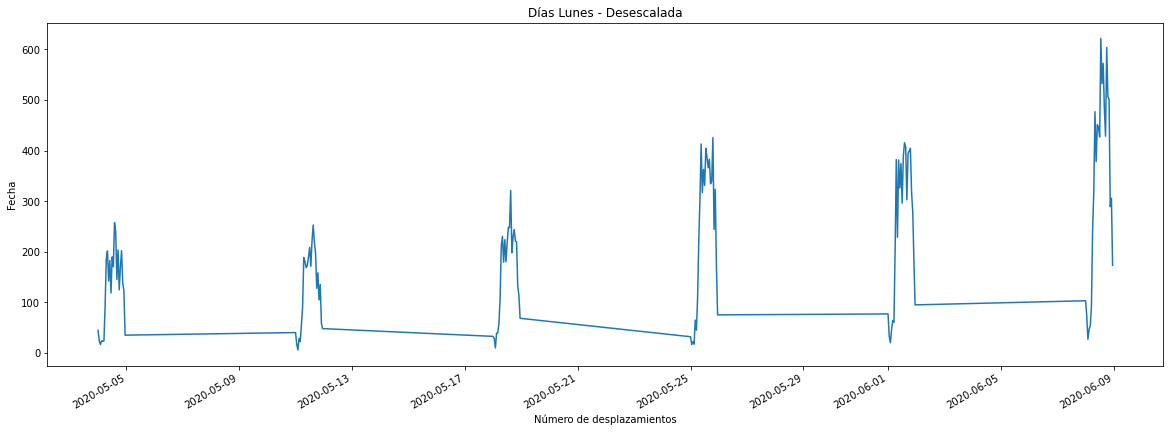

In [7]:
desescalada[desescalada.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Desescalada')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()


In [8]:
windows = [
    ('4 Hours', 4),
    ('8 Hours', 8),
    ('12 Hours', 12),
    ('24 Hours', 24),
    #('7 Days', 7 * 24),
    #('30 Days', 30 * 24),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(desescalada['2807905-2807901'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

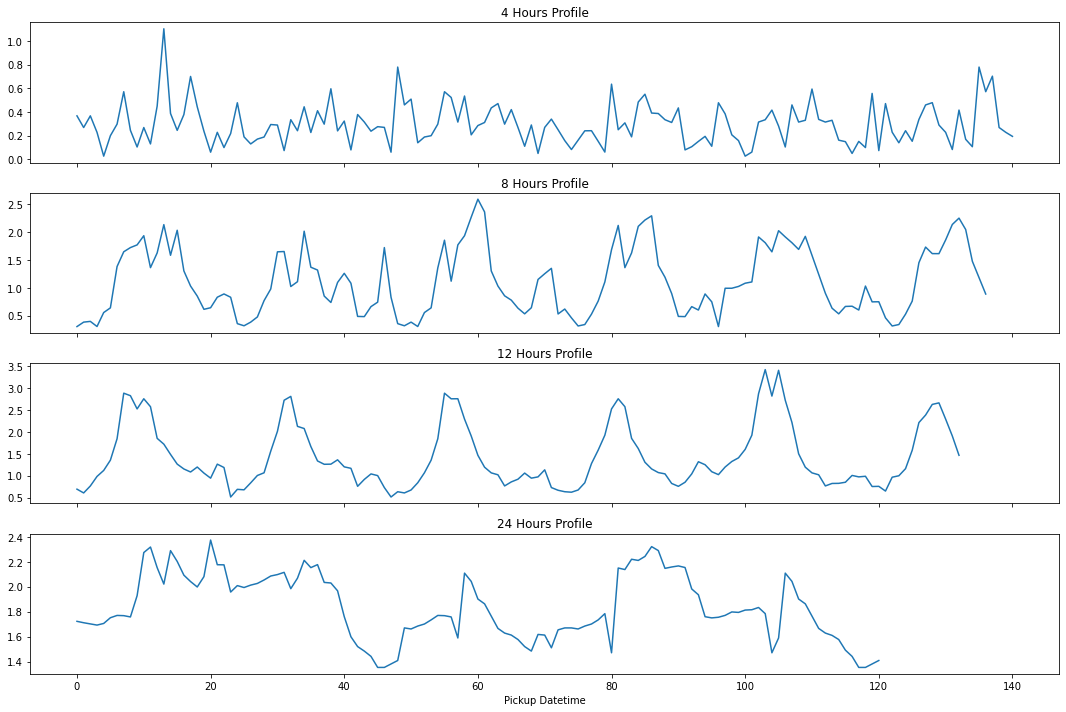

In [9]:
#Plot the signal data
fig, axes = plt.subplots(4,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

In [19]:
T = desescalada[desescalada.columns[0]] 
m = 24 
k = 2 
s = 70 

snippets, indices, profiles, fractions, areas, regimes = stumpy.snippets(T, m, k, s=s)

the starting index of the snippet #0 with length m=24 is: 72
the starting index of the snippet #1 with length m=24 is: 24


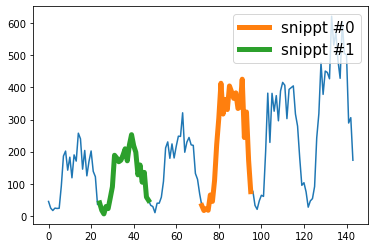

In [20]:
plt.plot(T)
for i in range(k):
    idx = indices[i]
    print(f'the starting index of the snippet #{i} with length m={m} is: {idx}')
    plt.plot(range(idx, idx + m), T[idx : idx + m], lw=5, label='snippt #{}'.format(i))

plt.legend(loc='upper right',fontsize=15)
plt.show()

# Periodo desescalada Viernes

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


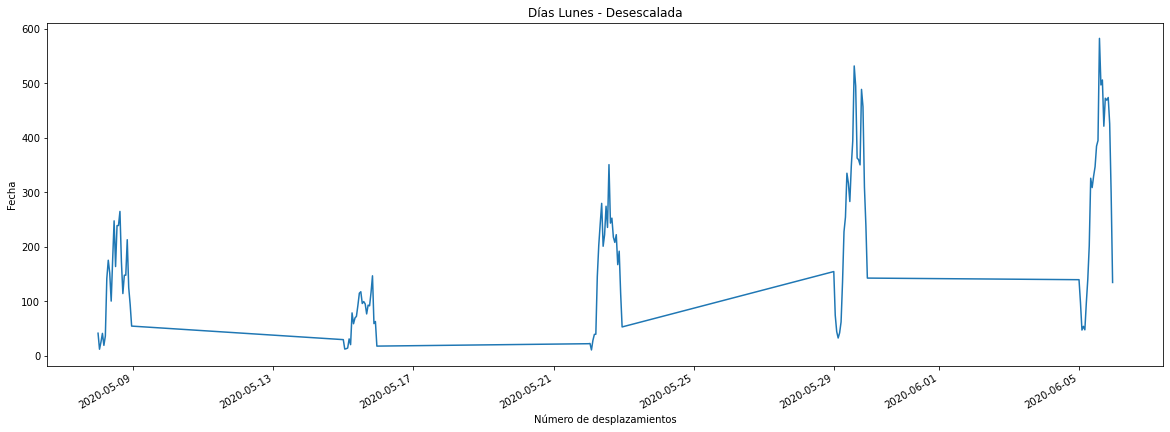

In [12]:
period1 = filtrado_Data_Friday_3
period2 = filtrado_Data_Friday_4
desescalada = pd.concat([period1,period2])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08')
mask = (desescalada['Fecha'] >= start_date) & (desescalada['Fecha'] <= end_date)
desescalada = desescalada.loc[mask]
desescalada = desescalada.reset_index()
desescalada = desescalada.set_index(["ds"])
#desescalada.tail(50)

desescalada[desescalada.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Desescalada')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

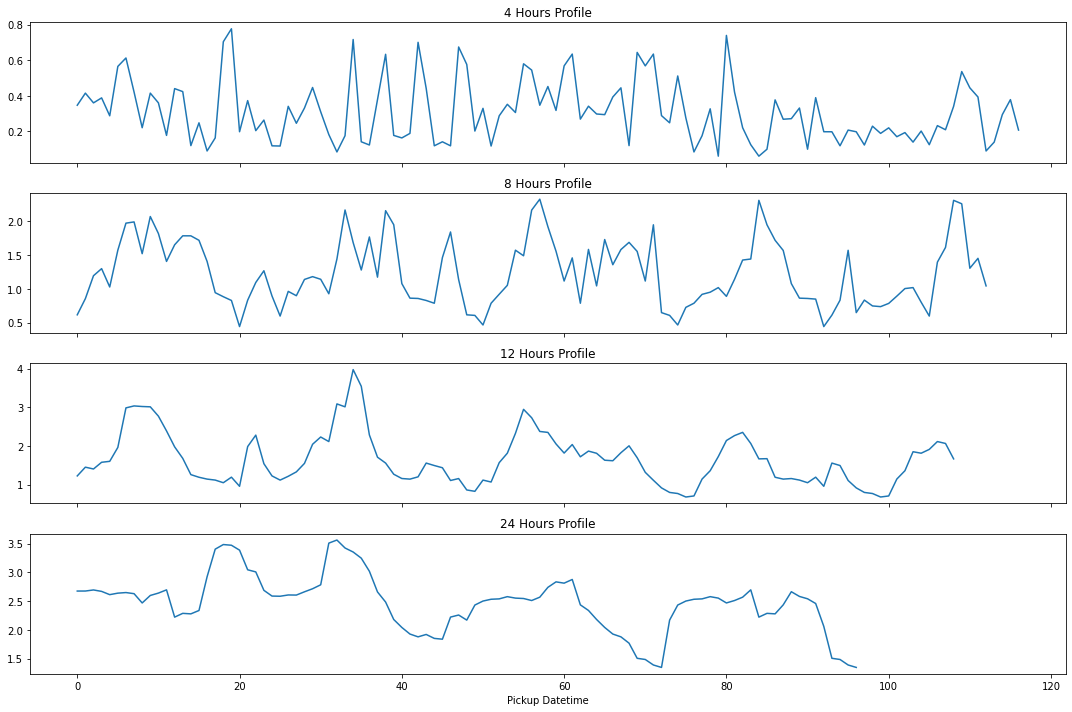

In [13]:
windows = [
    ('4 Hours', 4),
    ('8 Hours', 8),
    ('12 Hours', 12),
    ('24 Hours', 24),
    #('7 Days', 7 * 24),
    #('30 Days', 30 * 24),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(desescalada['2807905-2807901'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile
    
#Plot the signal data
fig, axes = plt.subplots(4,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

# Patrones Dia Lunes

In [14]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
desescalada = pd.concat([period1,period2])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08')
mask = (desescalada['Fecha'] >= start_date) & (desescalada['Fecha'] <= end_date)
desescalada = desescalada.loc[mask]
desescalada = desescalada.reset_index()

List = []
###############Lunes 1#######################
start_date = pd.Timestamp('2020-05-04')
mask = (desescalada['Fecha'] == start_date)
Lunes1 = desescalada.loc[mask]
Lunes1 = Lunes1.reset_index()
List.append(Lunes1['2807905-2807901'])
###############Lunes 2#######################
start_date = pd.Timestamp('2020-05-11')
mask = (desescalada['Fecha'] == start_date)
Lunes2 = desescalada.loc[mask]
Lunes2 = Lunes2.reset_index()
List.append(Lunes2['2807905-2807901'])
###############Lunes 3#######################
start_date = pd.Timestamp('2020-05-18')
mask = (desescalada['Fecha'] == start_date)
Lunes3 = desescalada.loc[mask]
Lunes3 = Lunes3.reset_index()
List.append(Lunes3['2807905-2807901'])
###############Lunes 4#######################
start_date = pd.Timestamp('2020-05-25')
mask = (desescalada['Fecha'] == start_date)
Lunes4 = desescalada.loc[mask]
Lunes4 = Lunes4.reset_index()
List.append(Lunes4['2807905-2807901'])
###############Lunes 5#######################
start_date = pd.Timestamp('2020-06-01')
mask = (desescalada['Fecha'] == start_date)
Lunes5 = desescalada.loc[mask]
Lunes5 = Lunes5.reset_index()
List.append(Lunes5['2807905-2807901'])
###############Lunes 6#######################
start_date = pd.Timestamp('2020-06-08')
mask = (desescalada['Fecha'] == start_date)
Lunes6 = desescalada.loc[mask]
Lunes6 = Lunes6.reset_index()
List.append(Lunes6['2807905-2807901'])

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these wil

## Visualizamos los días Lunes

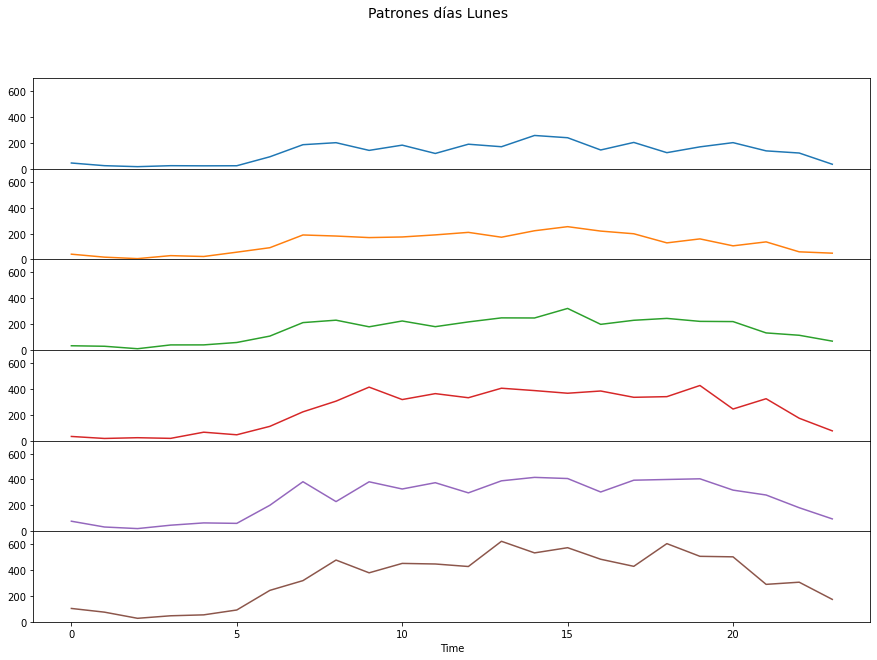

In [15]:
def plot_Lunes():    
    fig, ax = plt.subplots(len(List), sharex=True, sharey=True, figsize=(15,10))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, T in enumerate(List):        
        ax[i].plot(T, color=next(colors)["color"])
        ax[i].set_ylim((0, 700))
    plt.subplots_adjust(hspace=0)
    plt.xlabel('Time')
    return ax

plot_Lunes()
plt.suptitle('Patrones días Lunes', fontsize=14)
plt.show()

In [16]:
m = 3
radius, Ts_idx, subseq_idx = stumpy.ostinato(List, m)
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 0.14 in time series 1 starting at subsequence index location 13.


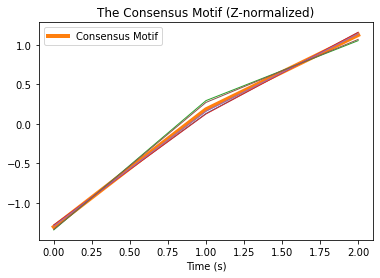

In [17]:
consensus_motif = List[Ts_idx][subseq_idx : subseq_idx + m]
nn_idx = []
for i, T in enumerate(List):
    nn_idx.append(np.argmin(stumpy.core.mass(consensus_motif, T)))
    lw = 1
    label = None
    if i == Ts_idx:
        lw = 4
        label = 'Consensus Motif'
    plt.plot(stumpy.core.z_norm(T[nn_idx[i] : nn_idx[i]+m]), lw=lw, label=label)

plt.title('The Consensus Motif (Z-normalized)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

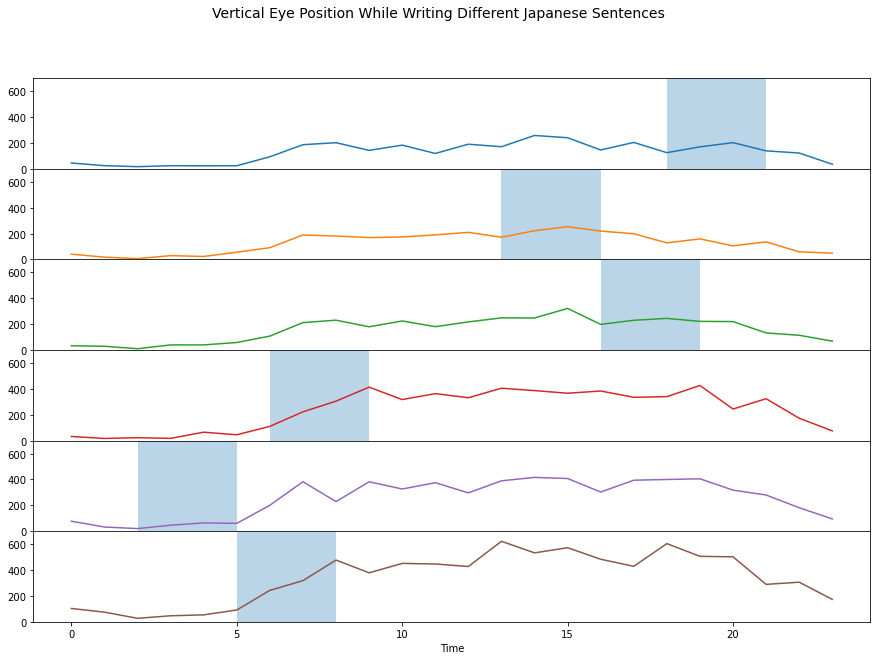

In [18]:
ax = plot_Lunes()
ymin, ymax = ax[i].get_ylim()
for i in range(len(List)):
    r = Rectangle((nn_idx[i], ymin), m, ymax-ymin, alpha=0.3)
    ax[i].add_patch(r)
plt.suptitle('Vertical Eye Position While Writing Different Japanese Sentences', fontsize=14)
plt.show()